In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

#from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']

import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer  #特征抽取 one-hot

from sklearn.model_selection import ShuffleSplit

import time

### 数据分析

In [2]:
train_data = pd.read_excel('data.xlsx',sheet_name='训练集', engine='openpyxl')  #读数据
test_data = pd.read_excel('data_test.xlsx', engine='openpyxl')

In [3]:
len(train_data['使用承运商'].value_counts().index)

38

### 看品牌方和使用承运商之间是否有关系

d:\anaconda\envs\py36\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from cu

d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25215 missing from current font.
  fon

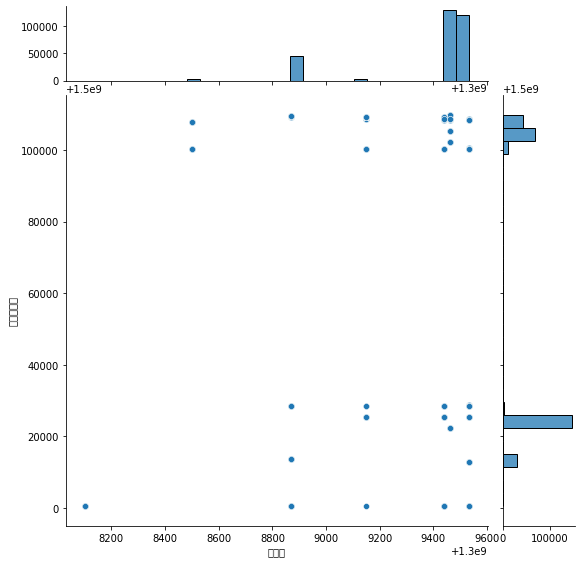

In [4]:
g = sns.JointGrid(data=train_data, x=train_data['品牌方'], y=train_data['使用承运商'],marginal_ticks=True, size=8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, bins=30)
#plt.savefig('D:/python/jupyter/美的/2021.11.19/T1室内温度和设定温度.jpg')

### 看品牌方和仓库编码之间是否有关系

d:\anaconda\envs\py36\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24211 missing from cu

d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32534 missing from current font.
  fon

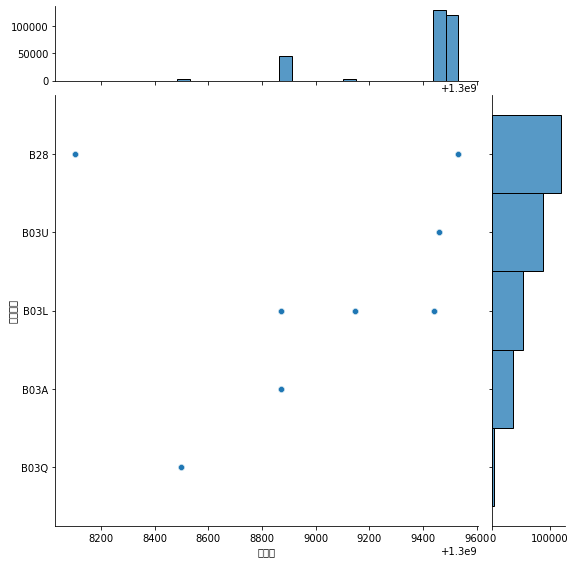

In [5]:
g = sns.JointGrid(data=train_data, x=train_data['品牌方'], y=train_data['仓库编码'],marginal_ticks=True, size=8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, bins=30)

### 看拣货区域和使用承运商之间是否有关系

d:\anaconda\envs\py36\lib\site-packages\seaborn\axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20351 missing from cu

d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  fon

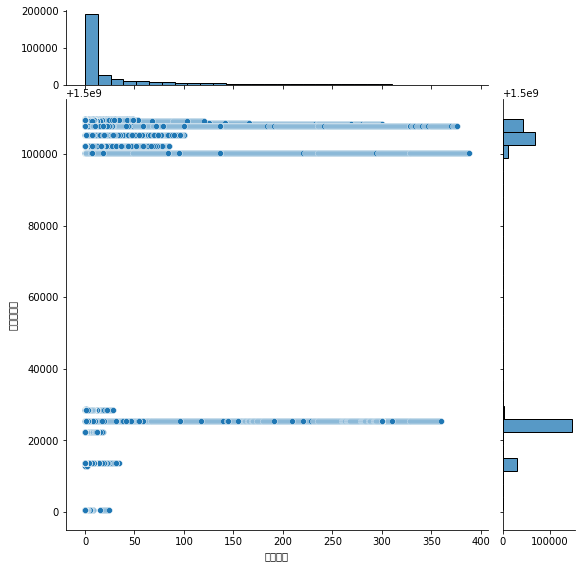

In [6]:
g = sns.JointGrid(data=train_data, x=train_data['拣货区域'], y=train_data['使用承运商'],marginal_ticks=True, size=8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, bins=30)

拣货区域是对仓库和商店更详细地址的分类，理论上一个大区域的商品可能会有同一个承运商承包（原理是商品是同一种类），
但是因为有商品种类列，所以本次建模时没有考虑这个特征

考虑过时间序列的问题，因为不同的时间，公司选的承运商可能不同
但是在本题中，时间变化范围小，不足以影响，就删去了

### 预处理

In [8]:
#统一收货省和收货市
province = [['安徽','安徽省'],['北京市','北京'],['福建','福建省'],['广东','广东省'],['广西','广西壮族自治区'],['广西省','广西壮族自治区'],
            ['贵州','贵州省'],['河北','河北省'],['河南','河南省'],['黑龙','黑龙江省'],['湖北','湖北省'],['湖南','湖南省'],
            ['江苏','江苏省'],['江西','江西省'],['辽宁','辽宁省'],['山东','山东省'],['陕西','陕西省'],['上海市','上海'],
            ['浙江','浙江省'],['重庆市','重庆']
           ]

city = [['保定','保定市'],['北京','北京市'],['大连','大连市'],['东莞','东莞市'],['福州','福州市'],['阜阳','阜阳市'],
        ['广州','广州市'],['贵阳','贵阳市'],['桂林','桂林市'],['哈尔滨','哈尔滨市'],['哈密','哈密市'],['杭州','杭州市'],
        ['合肥','合肥市'],['葫芦岛','葫芦岛市'],['湖州','湖州市'],['济南','济南市'],['江门','江门市'],['锦州','锦州市'],
        ['九江','九江市'],['临沂','临沂市'],['洛阳','洛阳市'],['马鞍山','马鞍山市'],['武汉','武汉市'],['西安','西安市'],
        ['绍兴','绍兴市'],['省直辖','省直辖县级行政区划'],['石家庄','石家庄市'],['北京','北京市'],['上海','上海市'],['天津','天津市'],
        ['台州','台州市'],['那曲','那曲市'],['南通','南通市'],['莆田','莆田市'],['濮阳','濮阳市'],['秦皇岛','秦皇岛市'],
        ['青岛','青岛市'],['泉州','泉州市'],['厦门','厦门市'],['淄博','淄博市'],['郑州','郑州市'],['长沙','长沙市'],
        ['榆林','榆林市'],['宣城','宣城市'],['徐州','徐州市'],['邢台','邢台市'],['咸阳','咸阳市'],['新乡','新乡市'],
       ]

In [4]:
# def preprocess(dt,dt1,):  #预处理函数1：传进去训练集、测试集，未做one-hot编码
#     for j in province:
#         dt.loc[dt['收货省'] == j[0], '收货省'] = j[1]
#         dt1.loc[dt1['收货省'] == j[0], '收货省'] = j[1]   #收货省统一标准
#     for i in city:
#         dt.loc[dt['收货市'] == j[0], '收货省'] = j[1]   #收货市统一标准
#         dt1.loc[dt1['收货市'] == j[0], '收货省'] = j[1]
#     dt = dt.drop(['订单号','创建时间','商品编码(数量)','拣货区域','收货省','收货区'], axis=1)  #删一些特征
#     dt1 = dt1.drop(['订单号','创建时间','商品编码(数量)','拣货区域','收货省','收货区'], axis=1)
#     dt = dt.reset_index(drop=True)
#     dt1 = dt.reset_index(drop=True)
    
#     dt['品牌方'] = dt['品牌方'].astype('int')        #转换类型
#     dt['订单内商品总数量'] = dt['订单内商品总数量'].astype('int')
#     dt['订单内商品总种类'] = dt['订单内商品总种类'].astype('int')
#     dt['理论体积'] = dt['理论体积'].astype('float')
#     dt['理论重量'] = dt['理论重量'].astype('float')
#     #dt['使用承运商'] = dt['使用承运商'].astype('int')
    
#     dt1['品牌方'] = dt1['品牌方'].astype('int')
#     dt1['订单内商品总数量'] = dt1['订单内商品总数量'].astype('int')
#     dt1['订单内商品总种类'] = dt1['订单内商品总种类'].astype('int')
#     dt1['理论体积'] = dt1['理论体积'].astype('float')
#     dt1['理论重量'] = dt1['理论重量'].astype('float')
#     #dt1['使用承运商'] = dt1['使用承运商'].astype('int')
    
#     dt = dt.dropna(axis=0, how='any')  #带零的样本全部删去
#     dt1 = dt1.dropna(axis=0, how='any')

#     return dt, dt1

In [5]:
# a,b =  preprocess(train_data, test_data)

In [6]:
# def process(dt, dt1): #预处理函数2：传进去训练集、测试集，每次打乱数据集，做one-hot编码
#     dt = sklearn.utils.shuffle(dt) #随机打乱
#     y_train = dt['使用承运商']
#     y_test = dt1['使用承运商']
#     dt = dt.drop(['使用承运商'], axis=1)
#     dt1 = dt1.drop(['使用承运商'], axis=1)
    
#     dict = DictVectorizer(sparse=False)
#     dt = dict.fit_transform(dt.to_dict(orient="records"))
#     dt1 = dict.transform(dt1.to_dict(orient="records"))
    
#      # 特征工程（标准化）
#     std = StandardScaler()
    
#     # 对测试集和训练集的特征值进行标准化
#     dt = std.fit_transform(dt)
#     dt1 = std.transform(dt1)
    
#     return dt,dt1,y_train,y_test 

In [9]:
#重量与体积列为1和0.001时（或对应倍数），则为该商品无重量体积数据
#将这种数据置零
def weight_volume(data):
    p = data[data['理论重量']%1==0]
    pp = p[p['理论体积']%0.001==0]
    pp =  pp[pp['理论体积']*1000 == pp['理论重量']]
    data.loc[pp.index,'理论重量'] = 0
    data.loc[pp.index,'理论体积'] = 0
    return data

In [10]:
def preprocess1(dt, dt1): #重写预处理函数：传进去训练集、测试集，不随机打乱数据，添加收货区
    dt = dt.drop(['订单号','创建时间','商品编码(数量)','拣货区域','收货省','收货区'], axis=1)  #删一些特征
    dt1 = dt1.drop(['订单号','创建时间','商品编码(数量)','拣货区域','收货省','收货区'], axis=1)
    
    dt = dt.dropna(axis=0, how='any')  #带零的样本全部删去
    #dt1 = dt1.dropna(axis=0, how='any')
    
#     for j in province:
#         dt.loc[dt['收货省'] == j[0], '收货省'] = j[1]  #收货省统一标准
#         dt1.loc[dt1['收货省'] == j[0], '收货省'] = j[1]   
    for i in city:
        dt.loc[dt['收货市'] == i[0], '收货市'] = i[1]   #收货市统一标准
        dt1.loc[dt1['收货市'] == i[0], '收货市'] = i[1]
    
    dt = weight_volume(dt)
    dt1 = weight_volume(dt1)
    
    dt['品牌方'] = dt['品牌方'].astype('int')        #转换类型
    dt['订单内商品总数量'] = dt['订单内商品总数量'].astype('int')
    dt['订单内商品总种类'] = dt['订单内商品总种类'].astype('int')
    dt['理论体积'] = dt['理论体积'].astype('float')
    dt['理论重量'] = dt['理论重量'].astype('float')
    
    dt1['品牌方'] = dt1['品牌方'].astype('int')
    dt1['订单内商品总数量'] = dt1['订单内商品总数量'].astype('int')
    dt1['订单内商品总种类'] = dt1['订单内商品总种类'].astype('int')
    dt1['理论体积'] = dt1['理论体积'].astype('float')
    dt1['理论重量'] = dt1['理论重量'].astype('float')

    dt = dt.reset_index(drop=True)
    dt1 = dt1.reset_index(drop=True)
    
    y_train = dt['使用承运商']     #拿到label
    y_test = dt1['使用承运商']
    dt = dt.drop(['使用承运商'], axis=1)  #删去label
    dt1 = dt1.drop(['使用承运商'], axis=1)
    
    dict = DictVectorizer(sparse=False)  #one-hot编码
    dt = dict.fit_transform(dt.to_dict(orient="records"))
    dt1 = dict.transform(dt1.to_dict(orient="records"))
    
    std = StandardScaler()       # 测试集和训练集的特征值进行标准化
    dt = std.fit_transform(dt)
    dt1 = std.transform(dt1)
    
    return dt,dt1,y_train,y_test 

### 决策树、随机森林、SVM训练

In [11]:
dec_acc = []
dec = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
#决策树可调超参数 树的高度#决策树可调超参数 树的高度
dec.fit(x_train, y_train)
y_predict = dec.predict(x_test)
# 预测准确率
print("预测的准确率：", dec.score(x_test, y_test))

预测的准确率： 0.9456313653419098


In [146]:
rf_acc = []
rf = RandomForestClassifier()
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("准确率：", rf.score(x_test, y_test))

准确率： 0.9503407611608852


In [14]:
y_predict

array([1500000531, 1500000531, 1500000531, ..., 1500108628, 1500108628,
       1500108628], dtype=int64)

In [139]:
svm_acc = []

svc = SVC()
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)
print("准确率：", rf.score(x_test, y_test))

准确率： 0.9492304158051919


In [138]:
ada_acc = []
k=200

### Tree numbers can be modified
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
clf = AdaBoostClassifier(n_estimators=k,learning_rate=0.8)
clf.fit(x_train, y_train)
ada_acc.append(clf.score(x_test,y_test))   
#y_pred=clf.predict(x_test)

print(ada_acc)
print(np.mean(ada_acc))

[0.31614212420552873]
0.31614212420552873


In [137]:
ann_acc = []
for k in range(10,15):
    ### Hidden layer numbers are confirmed(because we use MLP Classifier) ,
    ### but the parameter numbers on each layer can be modified.
    x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
    ANN=MLPClassifier(hidden_layer_sizes=[k], activation='relu', solver='adam')
    ANN.fit(x_train, y_train)
    ann_acc.append(ANN.score(x_test,y_test))   
    #y_pred=ANN.predict(x_test)
print(ann_acc)
print(np.mean(ann_acc))

d:\anaconda\envs\py36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.9558924879393522, 0.9570411210659315, 0.9587640707558006, 0.9571942721494755, 0.9567731066697297]
0.9571330117160579


In [140]:
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
ANN=MLPClassifier(hidden_layer_sizes=[12], activation='relu', solver='adam')
ANN.fit(x_train, y_train)
print(ANN.score(x_test,y_test))

0.9577685887127652


In [135]:
knn_acc = []

### The parameter k can be modified
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
print(knn_classifier.score(x_test,y_test))

0.8811547591699211


In [136]:
###The tree numbers and depth can be modified
x_train, x_test, y_train, y_test = preprocess1(train_data, test_data)
GBM=GradientBoostingClassifier()
GBM.fit(x_train,y_train)
print(GBM.score(x_test,y_test))

0.8435561681598898


### 准确率可视化

In [8]:
dec_acc = [0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348, 0.9739335631401348]
rf_acc = [0.973930258152578, 0.973930258152578, 0.9739236481774646, 0.9739203431899079, 0.9739269531650213, 0.9739335631401348, 0.973930258152578, 0.9739236481774646, 0.973930258152578, 0.973930258152578]
svm_acc = [0.9513109233143737]
ada_acc = [0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435, 0.6985487799638435]
ann_acc = [0.959173488711815, 0.9605748034358651, 0.9603533692695647, 0.9595271223803843, 0.9607830176519385]
knn_acc = [0.952424704120989, 0.9536442445294193, 0.9536310245791925, 0.9537863589943584, 0.9532013761968187, 0.9526758831752998, 0.9540771978993499, 0.9529270622296107, 0.9536971243303269]
gbm_acc = [0.9079098267195024]

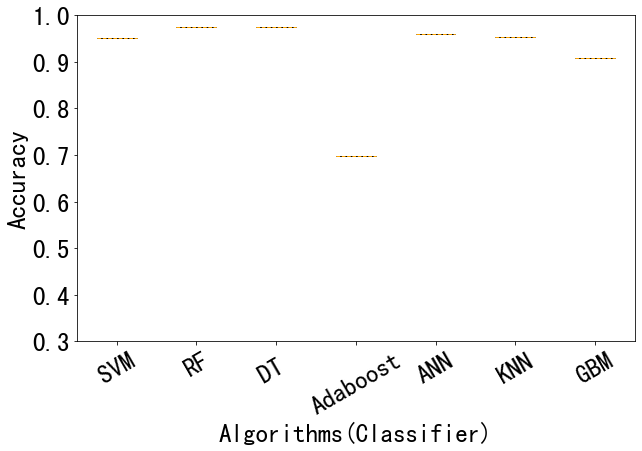

In [10]:
plt.figure(figsize = (10,6))
algorithms=['SVM','RF','DT ', 'Adaboost', 'ANN', 'KNN', 'GBM']
plt.boxplot((svm_acc, rf_acc, dec_acc, ada_acc, ann_acc, knn_acc, gbm_acc),
            labels=algorithms,
            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
            medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色

plt.xticks(rotation=30,fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0.3, 1)
#plt.title("The accuracy of classification models",fontsize=25)
plt.ylabel("Accuracy",fontsize=25)
plt.xlabel("Algorithms(Classifier)",fontsize=25)
plt.show()

### 随机森林效果最好